In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
twenty= pd.read_csv('twentyeleven.csv')
cars= pd.read_csv('cars.csv')
iris=pd.read_csv('iris.csv')


In [8]:
twenty.info()
twenty['InvoiceDate'] = pd.to_datetime(twenty['InvoiceDate'])
twenty['date'] = twenty['InvoiceDate'].dt.strftime('%Y-%m-%d')
twenty['date'] = pd.to_datetime(twenty['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      484329 non-null  float64            
 1   StockCode    484330 non-null  object             
 2   Description  484330 non-null  object             
 3   Quantity     484330 non-null  int64              
 4   InvoiceDate  484330 non-null  datetime64[ns, UTC]
 5   Price        484330 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      484330 non-null  object             
 8   date         484330 non-null  object             
 9   revenue      484330 non-null  float64            
 10  year         484330 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(4)
memory usage: 40.6+ MB


In [12]:
uk = twenty[twenty.Country == 'United Kingdom']
sales_per_day = uk.groupby('date').agg(total_sale=('Quantity','sum'))
sales_per_day

,total_sale
date,
2011-01-04,8337
2011-01-05,19034
2011-01-06,17929
2011-01-07,13276
2011-01-09,7321
...,...
2011-12-05,42817
2011-12-06,28464
2011-12-07,29821


<Axes: xlabel='date'>

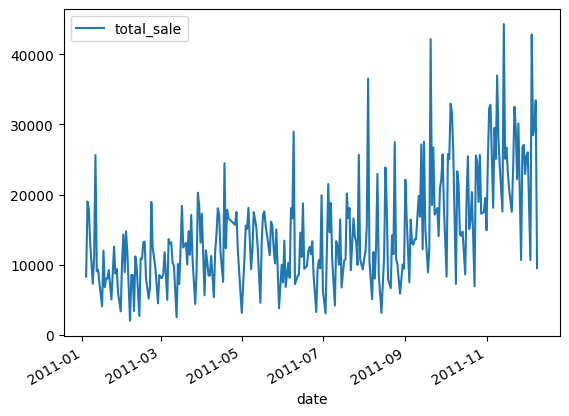

In [13]:
sales_per_day.plot()

In [14]:
countries = ["Canada","Denmark","EIRE","United Kingdom"]

In [17]:
four_countries = twenty[twenty.Country.isin(countries)]


array(['United Kingdom', 'EIRE', 'Denmark', 'Canada'], dtype=object)

In [18]:
sales_per_Day = four_countries.groupby(['Country','date']).agg(total_sales=('Quantity','sum')).reset_index()

In [21]:
sales_pivoted = pd.pivot_table(sales_per_Day,values='total_sales',
                               columns='Country',index='date',fill_value=0)
sales_pivoted

Country,Canada,Denmark,EIRE,United Kingdom
date,,,,
2011-01-04,0,0,0,8337
2011-01-05,0,0,0,19034
2011-01-06,0,0,0,17929
2011-01-07,0,0,0,13276
2011-01-09,0,0,85,7321
...,...,...,...,...
2011-12-05,0,173,219,42817
2011-12-06,0,0,0,28464
2011-12-07,0,0,1998,29821


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

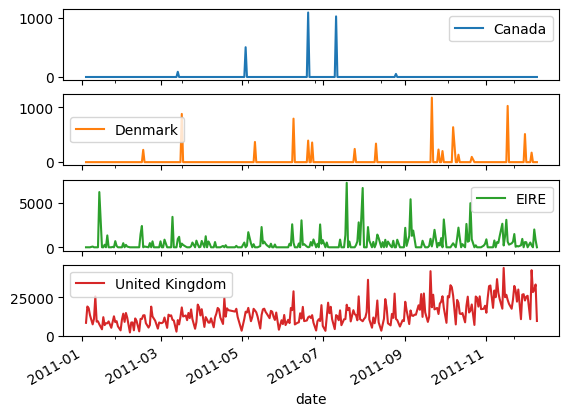

In [22]:
sales_pivoted.plot(subplots=True)

<Axes: xlabel='Price', ylabel='horsepower'>

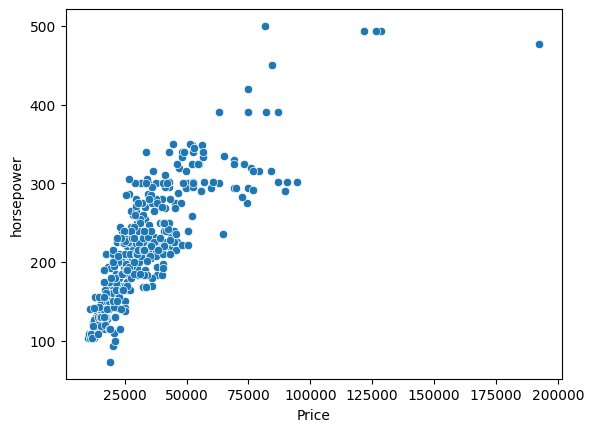

In [24]:
sns.scatterplot(x='Price', y='horsepower', data=cars)

In [25]:
setosa= iris[iris.species=='setosa']
virginica= iris[iris.species== 'virginica']
versicolor=iris[iris.species== 'versicolor']


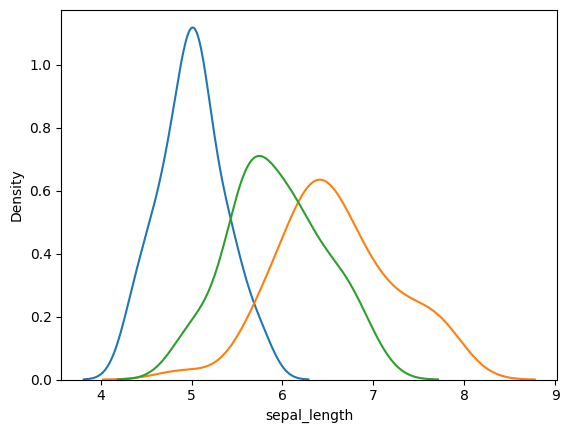

In [27]:

fig=sns.kdeplot(setosa.sepal_length,label='setosa')
fig=sns.kdeplot(virginica.sepal_length,label='virginica')
fig=sns.kdeplot(versicolor.sepal_length,label='versicolor')


<Axes: xlabel='cylenders', ylabel='horsepower'>

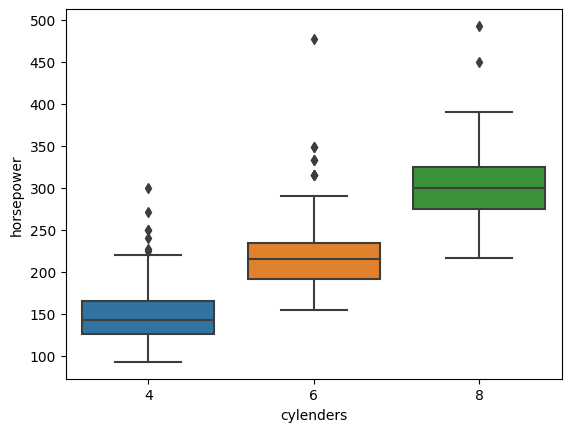

In [30]:
common_cylenders = cars[cars.cylenders.isin([4,6,8])]
sns.boxplot(x='cylenders', y='horsepower',data=common_cylenders)

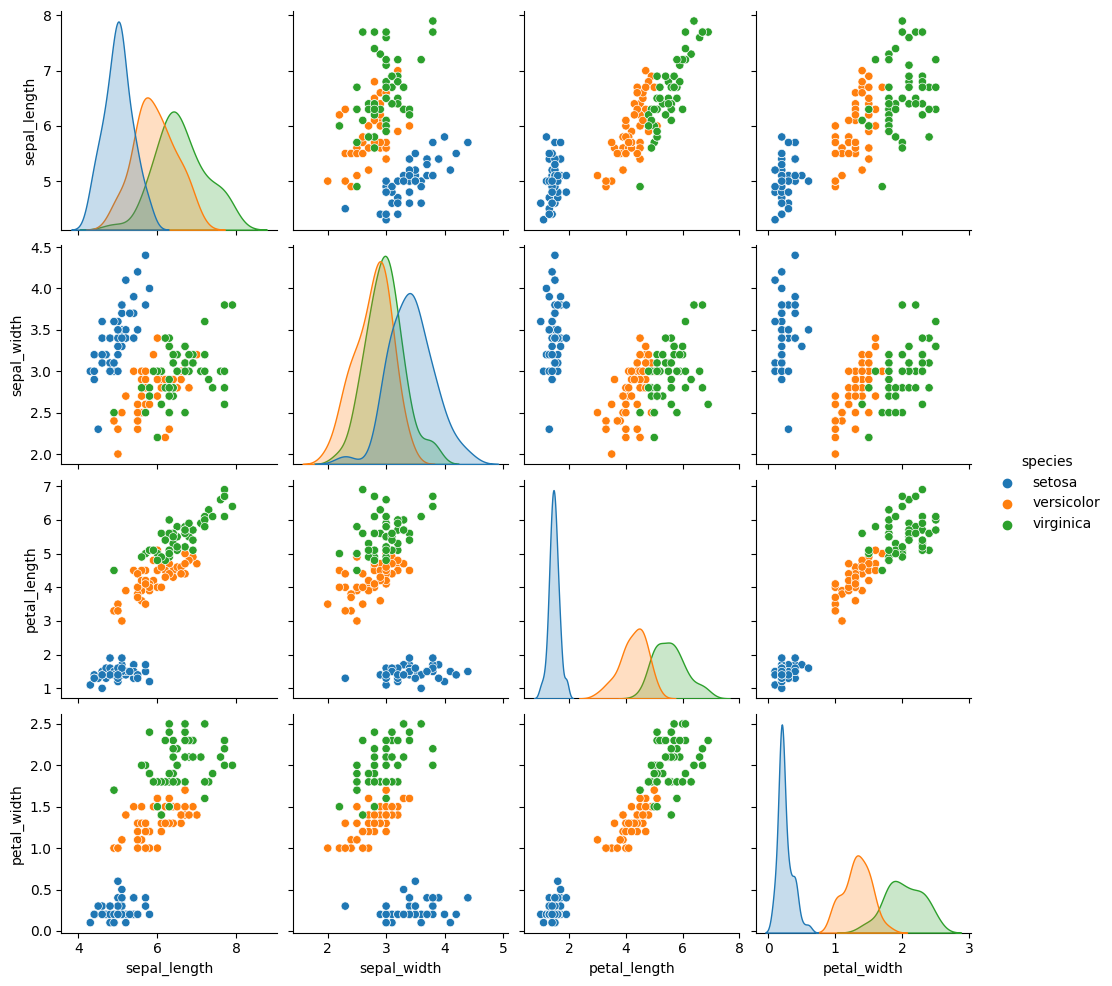

In [31]:
sns.pairplot(iris,hue='species')